In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp 
from scipy.constants import c
# import scipy as sp 
global c

In [27]:
def f(z,V,k,m,a,α):
    Vt = 0.0;
  #  R = 1.0;
    R =1.5e-20
    c=3e8
################################################
    # Γt
    G = (1-4*m**2+3*z**2+4*a**2 * m**2 -8*m**2 * z**2 + 3*z**4 - 4*m**2 * z**4 + z**6)
    ###
    Γt_tr = (m*(z+2*z**3+z**5+2*m-a*m*a**2+4*m*z**2+4*m*a**2 * z**2 + 2*m*z**4))/ (z**2 * G)
    Γt_tz = (m*z*(z+2*z**3+z**5+2*m-6*m*a**2+4*m*z**2+2*m*z**4))/(z**2 * G)
    Γt_rt = Γt_tr
    Γt_rϕ = (-m*a*(z+4*m))/(G)
    Γt_ϕr = Γt_rϕ
    Γt_ϕz = (-m*a*z*(3*z+4*m))/(G)
    Γt_zt = Γt_tz
    Γt_zϕ = Γt_ϕz
    Γt_tt = 0;
    Γt_tϕ = 0;
    Γt_rr = 0;
    Γt_zr = 0;
    Γt_ϕϕ = 0;
    Γt_rz = 0;
    Γt_zz = 0;
    Γt_ϕt = 0;
################################################
    # Γr
    H = (z+2*m)*z**2
    ####
    Γr_tt = m/H
    Γr_tϕ = (2*m*a)/H
    Γr_rr = -m/H
    Γr_rz = -m*z/H
    Γr_ϕt = 2*m*a/H
    Γr_ϕϕ = -1*(z**3+m+2*m*z**2)/H
    Γr_zr = (-m*z)/H
    Γr_zz = m/H;
    Γr_rϕ = 0;
    Γr_rt = 0;
    Γr_tr = 0;
    Γr_tz = 0;
    Γr_ϕr = 0;
    Γr_zϕ = 0;
    Γr_ϕz = 0;
#######################
    # Γϕ
    Γϕ_tz = ((a*m*z)*(-4*m+3*z))/(G)
    Γϕ_zϕ = (-1*(m*z)*(z+2*z**3+z**5-2*m+6*m*a**2-4*m*z**2-2*m*z**4))/((1+z**2)*G)
    Γϕ_ϕz = -Γϕ_zϕ;
    Γϕ_ϕr = 0;
    Γϕ_ϕϕ = 0;
    Γϕ_ϕt = 0;
    Γϕ_tr = 0;
    Γϕ_rϕ = 0;
    Γϕ_tt = 0;
    Γϕ_tϕ = 0;
    Γϕ_rr = 0;
    Γϕ_zr = 0;
    Γϕ_rz = 0;
    Γϕ_zz = 0;
#######################
     # Γz
    L = (1+z**2)*(z+2*m)
    Γz_tt = (m*z)/(L)
    Γz_tϕ = (-1*(3*m*a*z)/(L*(1+z**2)))
    Γz_rr = (m*z)/(L)
    Γz_rz = (-m*R)/(L)
    Γz_ϕt = (-3*m*a*z*R**2)/(L*(1+z**2))
    Γz_ϕϕ = (m*z)/(L*(1+z**2))
    Γz_zr = -m/L
    Γz_zz = (-m*z)/((1+z**2)*(np.sqrt(z)+2*m))
    Γz_tr = 0;
    Γz_tz = 0;
    Γz_ϕr = 0;
    Γz_rϕ = 0;
    Γz_zϕ = 0;
    Γz_ϕz = 0;
    Γz_zt = 0;
    
#######################################
#     Vz,Vϕ,Bϕ,Vr = V
    Vr,Vϕ,Vz,Bϕ = V
#     γ = 1./(np.sqrt(1-(Vz**2 + Vϕ**2)))
    γ = 1./np.sqrt(1 - ((Vr**2 + Vϕ**2 + Vz**2)/(c**2)))
    print(γ)
    U0 = γ;
    Ur = γ*Vr;
    Uϕ = γ*Vϕ;
    Uz = γ*Vz;  
    gzz = -z/(z+2*m)
    Bz = 1
    Br = 1
    ###############################
    P = k*z**(-2.5)
    dP = -2.5*k*z**(-3.5)
    ρ = z**(-1.5)
    dρ = -1.5*z**(-2.5)
    ##############################
    # dVzdz
    L1 = (ρ+P/c**2)*U0**2 \
    * (((c**2)/(2*U0*(U0*(Bϕ*Uz-Bz*Uϕ) + ((z**3 * Bz)/(m*a))))) - Vz)
    
    L2 = (ρ+P/(c**2))*U0**2
  
    L3 = c**2 * (Γz_tt-Γt_tt*Vz/c) + 2*Vr*(Γz_tr - Γt_tr*Vz) + 2*Vϕ*(Γz_tϕ-Γt_tϕ*Vz) \
    + 2*Vz*(Γz_tz-Γt_tz*Vz)+Vr**2 *(Γz_rr-Γt_rr*Vz/c)+Vr*Vϕ*(Γz_ϕr-Γt_ϕr*Vz/c)\
    + Vr*Vz*(Γz_zr-Γt_zr*Vz/c)+Vϕ*Vr*(Γz_rϕ-Γt_rϕ*Vz/c)+Vϕ**2 *(Γz_ϕϕ-Γt_ϕϕ*Vz/c) \
    + Vϕ*Vz*(Γz_zϕ-Γt_zϕ*Vz/c)+Vz*Vr*(Γz_rz-Γt_rz*Vz/c)+Vz*Vϕ*(Γz_ϕz-Γt_ϕz*Vz/c)\
    + Vz**2 * (Γz_zz - Γt_zz*Vz/c)
    
    L4 = z*dP/(z+2*m)
#     L5 = Vz*(dρ + dP/c)+(ρ+P/c)*L6 - (1/(4*np.pi*c**2*u0)) * (L7+L8+L9)
    L6 = Vr*(Γr_rr + Γϕ_ϕr + Γz_zr - Γt_rt) \
    + Vϕ * (Γr_rϕ + Γϕ_ϕϕ + Γz_zϕ - Γt_ϕt) \
    + Vz * (Γr_rz + Γϕ_ϕz + Γz_zz - Γt_zt) \
    - (Γt_rr*Vr**2 /c) - (Γt_rϕ*Vr*Vϕ/c) - (Γt_rz*Vz*Vr/c) - (Γt_ϕr*Vr*Vϕ/c)\
    - (Γt_ϕϕ*Vϕ*Vϕ/c) - (Γt_ϕz*Vz*Vϕ/c) - (Γt_zr*Vr*Vz/c) - (Γt_zϕ*Vϕ*Vz/c)\
    - (Γt_zz*Vz*Vz/c) + c*(Γr_rt+Γϕ_ϕt+Γz_zt)
    
    L7 = 2*(U0*(Bϕ*Uz-Bz*Uϕ) + ((z**3*Bz)/(m*a)))\
    *(((4*m*z*Bϕ)/(z+2*m)**3) + (Γϕ_ϕz+Γr_zr+Γz_zz+Γt_tz)*((z**2 * Bϕ)/(z+2*m)**2))
    
    L8 = 2*(((z**3 * Br)/(m*a))+U0*(Bϕ*Ur-Br*Uϕ))\
    *(Γz_zr+Γt_tr+Γϕ_ϕr+Γr_rr)*((z**2 * Bϕ)/(z+2*m)**2)
    
    L9 = -2*(U0*Bz)*(Br*Uz-Bz*Ur)\
    *((Γϕ_tr * ((z**4)/(2*m*a*(z+2*m)))) \
      + (Γt_tr+Γr_rr+Γϕ_rϕ+Γz_zr)*((z**2)/(z+2*m)**2) )
    
    L5 = Vz*(dρ + dP/c)+(ρ+P/c)*L6 - (1/(4*np.pi*c**2*U0)) * (L7+L8+L9)
    
    L10 = ((z*Br*Bz)/(z+2*m))\
    *((Γϕ_tr * ((z**4)/(2*m*a*(z+2*m))))\
      +(Γt_tr+Γr_rr+Γϕ_rϕ+Γz_zr)*((z**2)/(z+2*m)**2)) \
    + ((Vz*z**5 * Br*Bϕ)/(2*m*a*c*(z+2*m)))\
    *(Γz_zr+Γt_tr+Γϕ_ϕr+Γr_rr)
    
    L11 = (((Vz*Bz*z**3)/(2*m*a*c)) - ((z*Bϕ)/(z+2*m)))\
    *(((4*z*m*Bϕ)/(z+2*m)**3) + ((z**2)/(z+2*m)**2)\
      *((2*np.pi*c**2 * U0 * m*a*L5*(z+2*m)**2)/(z**2*(m*a*U0*(Bϕ*Uz-Bz*Uϕ)+z**3 * Bz)))\
      + ((z**2*Bϕ)/(z+2*m)**2)*(Γϕ_ϕz+Γr_zr+Γz_zz+Γt_tz))
    
    
    dVzdz = L1**(-1) * (L2 * L3 + L4 - (1/4*np.pi)*(L10 + L11))
    dBϕdz = M1*(M2+M3*M4+M8)
    dVϕdz = N1*(N2*N3 - (1./4*np.pi)*(N4*N5) )
    dVrdz = N1*(N2*K3 - (1./4*np.pi)*(K4+K5+K6))

    #####################################3
    # dBϕdz
    M1 = (2*np.pi*c**2 * U0**2 *(z+2*m)**2)\
    /(z**2 * (U0*(Bϕ*Uz - Bz*Uϕ) + ((z**3 * Bz)/(m*a))))
    
    M2 = Vz*(dρ - dP/c**2)
    M3 = ρ + P/c**2
    # M5+M6 = L6
    
    M7 = dVzdz
    M4 = L6+M7
    M8 = -(1./(4*np.pi*c**2 * U0))*(L7+L8+L9)
    dBϕdz = M1*(M2+M3*M4+M8)
###############################################
    # dVϕdz
    N1 = ((-1.)/(Vz*M3*U0**2))
    N2 = M3*U0**2
    N3 = c**2 * (Γϕ_tt-Γt_tt * Vϕ/c) \
    + 2*Vr*(Γϕ_tr-Γt_tr*Vϕ) \
    + 2*Vϕ*(Γϕ_tϕ-Γt_tϕ*Vϕ) \
    + 2*Vz*(Γϕ_tz-Γt_tz*Vϕ) \
    + Vr*Vr*(Γϕ_rr-Γt_rr*Vϕ/c) \
    + Vr*Vϕ*(Γϕ_ϕr-Γt_ϕr*Vϕ/c) \
    + Vr*Vz*(Γϕ_zr-Γt_zr*Vϕ/c) \
    + Vϕ*Vr*(Γϕ_rϕ-Γt_rϕ*Vϕ/c) \
    + Vϕ*Vϕ*(Γϕ_ϕϕ-Γt_ϕϕ*Vϕ/c) \
    + Vϕ*Vz*(Γϕ_zϕ-Γt_zϕ*Vϕ/c) \
    + Vz*Vr*(Γϕ_rz-Γt_rz*Vϕ/c) \
    + Vz*Vϕ*(Γϕ_ϕz-Γt_ϕz*Vϕ/c) \
    + Vz*Vz*(Γϕ_zz-Γt_zz*Vϕ/c) 
    
    N4 = (((Vϕ*z**3 * Bz)/(2*m*a*c))\
          +((z*Bz)/(z+2*m)))\
    *(((4*z*m*Bϕ)/(z+2*m)**3)\
      +((z**2)/(z+2*m)**2)*dBϕdz\
      +((z**2 * Bϕ)/(z+2*m)**2)*(Γϕ_ϕz+Γr_zr+Γz_zz+Γt_tz))
    
    N5 = (((Vϕ*z**3 * Br)/(2*m*a*c))\
          +((z*Br)/(z+2*m)))\
    * (((z**2 * Bϕ)/(z+2*m)**2)*(Γz_zr+Γt_tr+Γϕ_ϕr+Γr_rr))
    
    dVϕdz = N1*(N2*N3 - (1./4*np.pi)*(N4*N5) )

##############################################################
    # dVrdz
    
    K3 = c**2 * (Γr_tt-Γt_tt*Vr/c)\
    + 2*Vr*(Γr_tr-Γt_tr*Vr/c) \
    + 2*c*Vϕ*(Γr_tϕ-Γt_tϕ*Vr/c)\
    + 2*c*Vz*(Γr_tz-Γt_tz*Vr/c)\
    + Vr*Vr*(Γr_rr-Γt_rr*Vr/c)\
    + Vr*Vϕ*(Γr_ϕr-Γt_ϕr*Vr/c)\
    + Vr*Vz*(Γr_zr-Γt_zr*Vr/c)\
    + Vϕ*Vr*(Γr_rϕ-Γt_rϕ*Vr/c)\
    + Vϕ*Vϕ*(Γr_ϕϕ-Γt_ϕϕ*Vr/c)\
    + Vϕ*Vz*(Γr_zϕ-Γt_zϕ*Vr/c)\
    + Vz*Vr*(Γr_rz-Γt_rz*Vr/c)\
    + Vz*Vϕ*(Γr_ϕz-Γt_ϕz*Vr/c)\
    + Vz*Vz*(Γr_zz-Γt_zz*Vr/c)
    
    K4 = ((Vr*z**3 * Bz)/(2*m*a*c))\
          *(((4*z*m*Bϕ)/(z+2*m)**3)\
            +((z**2)/(z+2*m)**2)*dBϕdz\
            +((z**2 * Bϕ)/(z+2*m)**2)*(Γϕ_ϕz+Γr_zr+Γz_zz+Γt_tz))
          
    K5 = ((z*Bz**2)/(z+2*m))\
          *(((Γϕ_tr*z**4)/(2*m*a*(z+2*m)))\
            + ((z**2)/(z+2*m)**2)*(Γt_tr+Γr_rr+Γϕ_rϕ+Γz_zr))
          
    K6 = (((Vr*z**3 * Br)/(2*m*a*c))\
          -((z*Bϕ)/(z+2*m)))\
    * (((z**2 * Bϕ)/(z+2*m)**2)*(Γz_zr+Γt_tr+Γϕ_ϕr+Γr_rr))
          
    dVrdz = N1*(N2*K3 - (1./4*np.pi)*(K4+K5+K6))
    
    dVdz = [dVrdz,dVϕdz,dVzdz,dBϕdz]
    return dVdz

In [28]:
z0 = 1.5e-20
V = solve_ivp(fun=f, t_span=[4.1*z0,10.2*z0], y0=[c*1e-10,c*0.0001,c*0.0007,4e0],
             method='Radau', args=(0.364,5e-4,1,1), dense_output=False) 

1.00000024965431
1.00000024965431
1.00000024965431
1.00000024965431
1.0000002496543026
1.00000024965431
1.00000024965431
1.00000024965431
1.00000024965431
1.0084373959614252
1.0014752223688084
1.0044057294425182


In [21]:
V.y.shape

(4, 1)

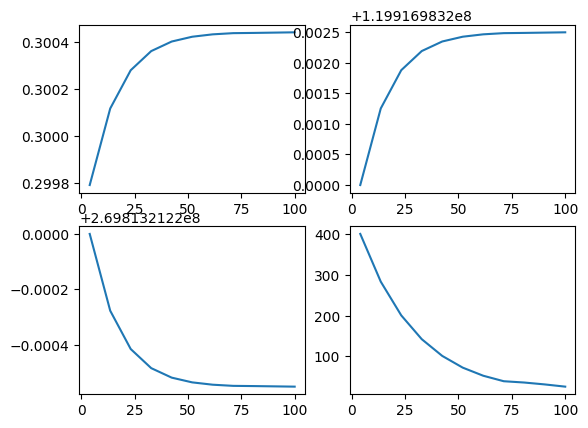

In [53]:
dim = V.y.shape[1]
t = np.linspace(4,100,dim)
vr = V.y[0,0:dim]
vphi = V.y[1,0:dim]
vz = V.y[2,0:dim]
bphi = V.y[3,0:dim]
plt.subplot(221)
plt.plot(t,vr)
plt.subplot(222)
plt.plot(t,vphi)
plt.subplot(223)
plt.plot(t,vz)
plt.subplot(224)
plt.plot(t,bphi)
# plt.plot(t,vz)
plt.show()